# Set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import statsmodels.api as sm
from statsmodels.api import OLS

In [2]:
lc_census_merged = pd.read_csv('../data/2014_loan_data/pct_accepted_by_zip3_2014_ALL.csv', dtype={'zip_3':str})
all_loans_2014 = pd.read_csv('../hugo/all_loans_2014', dtype={'ZIP':str}, low_memory = False)
all_loans_2015 = pd.read_csv('../hugo/all_loans_2015', dtype={'ZIP':str}, low_memory = False)
census = pd.read_csv('../data/census_zip3.csv', dtype={'zip_3':str})

In [6]:
all_loans_2014_merged = all_loans_2014.merge(census, "left", left_on="ZIP", right_on="zip_3")
all_loans_2015_merged = all_loans_2015.merge(census, "left", left_on="ZIP", right_on="zip_3")

# What variables should we care about?

[Legally protected classes](https://content.next.westlaw.com/Document/Ibb0a38daef0511e28578f7ccc38dcbee/View/FullText.html?contextData=sc.Default&transitionType=Default&firstPage=true&bhcp=1):
* Race
* Color
* Religion or creed
* National origin or ancestry
* Sex
* Age
* Physical or mental disability
* Veteran status
* Genetic information
* Citizenship

Characteristics that are protected by being an Equal Housing Lender, which Lending Club is:
* Race
* Color
* Religion
* National origin
* Sex
* Handicap
* Familial status

Other variables research suggests is correlated to socioeconomic status and other important socio-political outcomes:
* **Education**
* Unemployment
* Poverty
* Income/wealth

<hr>
Variables we have through Lending Club (individual-level fairness):
* Income (`annual_inc_joint`, `annualInc`)
* Loan description (could be used to back out loans for families, for instance) (`desc`)
    * This is something we'd need text analysis for, probably beyond our scope
* Debt-to-income ratio (`dti`)
* Number of mortgage accounts (could be used to back out loans for families) (`mortAcc`)
* Job description (`emp_title`)

Variables that we have through the Census (group-level fairness): 
* Race
* Education
* Family status
* Gender x age
* Unemployment rate
* Workforce
* Household income

<hr>

Synthesizing, it seems like these are our best options for proceeding:

| Type | Features |
| --- | --- |
| Individual-level fairness | *Income* |
| Group-level fairness | *Race, family status, education, unemployment* |

Will consider both **post-hoc** adjustments to achieve fairness (statistical/conditional parity, calibration/predictive equality) and **built-in** fairness features (adjusting the loss function to balance loss by a group of interest).

# Individual-level fairness

* just using reject data, see if people in same zip codes with different dti, risk scores, employment lengths are rejected differently
* histograms for dti and risk score and bar charts for employment

Going to need more full data set to do this, not the scaled back one we have here.

# Group-level fairness

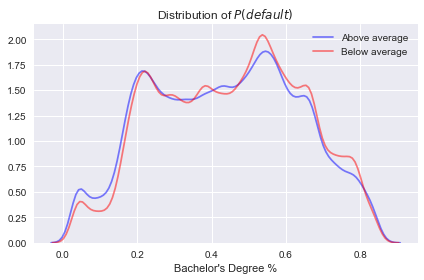

In [46]:
bachelor_deg_tiles = np.percentile(all_loans_2014_merged.Bachelors_Degree_pct.dropna(), [0,25,50,75,100])
bachelor_deg_0_25 = all_loans_2014_merged.Bachelors_Degree_pct < bachelor_deg_tiles[0]
bachelor_deg_25_50 = all_loans_2014_merged.Bachelors_Degree_pct < bachelor_deg_tiles[1]  
bachelor_deg_50_75 = all_loans_2014_merged.Bachelors_Degree_pct < bachelor_deg_tiles[2]
bachelor_deg_75_100 = all_loans_2014_merged.Bachelors_Degree_pct < bachelor_deg_tiles[3]


sns.kdeplot(all_loans_2014_merged.proba[bachelor_deg_ind==True].dropna(), color="blue", label="Above average", alpha=0.5)
sns.kdeplot(all_loans_2014_merged.proba[bachelor_deg_ind==False].dropna(), color="red", label="Below average", alpha=0.5)
plt.xlabel("Bachelor's Degree %")
plt.title(r"Distribution of $P(default)$")
plt.legend()
plt.tight_layout()


In [55]:
bachelor_deg_tiles[0] < all_loans_2014_merged.Bachelors_Degree_pct < bachelor_deg_tiles[1]  

NameError: name 'bachelor_deg_tiles' is not defined

In [54]:
np.percentile(all_loans_2014_merged.Bachelors_Degree_pct.dropna(), [0,25,50,75,100])[0]

0.04252631578947368